In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['POS_CASH_balance.csv', 'bureau_balance.csv', 'application_train.csv', 'previous_application.csv', 'installments_payments.csv', 'credit_card_balance.csv', 'sample_submission.csv', 'application_test.csv', 'bureau.csv']


# Objective of the notebook
This notebook is meant for EDA of Application Dataset. We will be exploring different kinds of  numeric and categorical variables and also be plotting them. We will make use of Matplotlib and Seaborn library for plotting. 

The secondary objective of the notebook is also to help us understand the different plotting functions of Matplotlib and Seaborn libraries. Generally a good idea of proceeding with the analysis is to find correlation of independent variables with the target variable and then explore some of the highly(both positive and negative) correlated variables. But as the purpose of the notebook is also to experiment with plotting libraries we will explore columns even if they don't have a high correlation.

I would like to thank the brilliant kernels that are uploaded on Kaggle which inspired me to find new ways to explore data and create different kinds of graphs. 

This is undoutedly the best kernel I found so far which inspired a lot of ideas and graphs in this jupyter notebook: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [2]:
#Reading the dataset
application = pd.read_csv("../input/application_train.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Is the dataset imbalanced?
For problems involving repayment of loans, credit etc. it is highly possible that the dataset is imbalanced

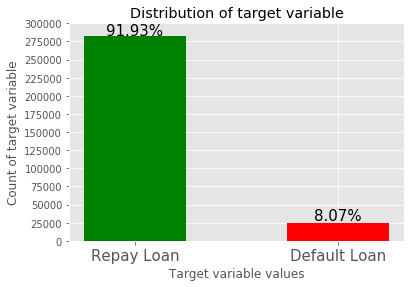

In [3]:
target_col = application['TARGET'].value_counts()
x = target_col.index.tolist()
y = target_col.values
total_observations = y.sum()

'''Matplotlib code starts here'''
fig = plt.figure()
ax = fig.add_subplot(111)
#or use this: fig, ax = plt.subplots()
bar_plot = ax.bar(x, y, width=0.5, color='gr')
ax.set_xticks(x)
ax.set_xlabel('Target variable values')
ax.set_xticklabels(['Repay Loan','Default Loan'], rotation=0, fontsize=15)

ax.set_ylim(ymin=0, ymax=300000)
ax.set_ylabel('Count of target variable')
ax.set_yticks(np.arange(0, 325000, 25000))

#The commented code below will convert y axis into percentage
# formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
# ax.yaxis.set_major_formatter(formatter)

for rect in bar_plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%.2f' % ((height/total_observations)*100) + "%", ha='center', va='bottom', fontsize=15)

plt.title('Distribution of target variable')
plt.show()

Clearly we can see that the dataset is imbalanced. An approach to be final modeling can involve using stratified k fold cross validation as both the classes will have equal representation and hopefully the model will be capable of identifying the default loans in a better way

# 2. Correlation of independent variables with target variables
Let's list the top 10 postively and negatively correlated variables

In [4]:
corr_vars = application.corr()['TARGET'].sort_values()
positive_corr = corr_vars[corr_vars > 0].sort_values(ascending=False).drop('TARGET')[:10]
negative_corr = corr_vars[corr_vars < 0].sort_values(ascending=True)[:10]

In [5]:
positive_corr

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64

In [6]:
negative_corr

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

It might be a good idea to start exploration with 'DAYS_BIRTH' and 'EXT_SOURCE_3' as they are highly correlated with the target variable

# 3. Columns with missing values

In [32]:
cols_with_missing_values = len(application.isnull().sum()[application.isnull().sum() > 0])
total_cols = application.shape[1] - 1
print("{} columns out of total {} columns have missing values".format(cols_with_missing_values, total_cols))

67 columns out of total 123 columns have missing values


More than 50% of the columns having missing values. While algorithms like Gradient boosting does not make it necessary to impute missing values we can still see which columns have high proportion of missing values

In [8]:
missing_cols_prcnt = application.isnull().sum()/application.shape[0] * 100
high_missing_values = missing_cols_prcnt[missing_cols_prcnt > 50]
high_missing_values_index = high_missing_values.index.tolist()
print("{} columns have more than 50% missing values".format(len(high_missing_values_index)))
print("Top 10 columns with highest proportion of missing values:")
high_missing_values.sort_values(ascending=False)[:10]

41 columns have more than 50% missing values
Top 10 columns with highest proportion of missing values:


COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MODE       68.354953
dtype: float64

Columns with a lot of missing values is quite high. Now removing all the columns is not possible. So here we can adopt a 2 step approach<br>
1) Find correlation with target variable and drop those columns which have  absolute correlation lower than 0.02<br>
2) For the remaining variables, imputation can be done by median for numerical variables and mode for categorical variables

In [9]:
correlations = application.corr()['TARGET'].sort_values()
corr_missing_cols = correlations.reindex(high_missing_values_index).sort_values()
missing_cols_to_be_dropped = corr_missing_cols.index.difference(corr_missing_cols[(corr_missing_cols > 0.02) | (corr_missing_cols < -0.02)].index).tolist()
print("Number of columns that are to be dropped: {}".format(len(missing_cols_to_be_dropped)))

Number of columns that are to be dropped: 19


# 4. Exploring AMT columns
1. We will start by having a look at the summary statistics (there are 4 columns in total)
2. We will plot the distribution along with its boxplot. As for implementation details we will go through how we can dynamically plot multiple subplots

In [10]:
pd.options.display.float_format = '{:.2f}'.format #Used to avoid scientific notation
application[["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE
count,307511.00,307499.00,307511.00,307233.00
mean,168797.92,27108.57,599026.00,538396.21
std,237123.15,14493.74,402490.78,369446.46
min,25650.00,1615.50,45000.00,40500.00
25%,112500.00,16524.00,270000.00,238500.00
50%,147150.00,24903.00,513531.00,450000.00
75%,202500.00,34596.00,808650.00,679500.00
max,117000000.00,258025.50,4050000.00,4050000.00


 Let's initially plot a distribution along with its boxplot using Seaborn

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


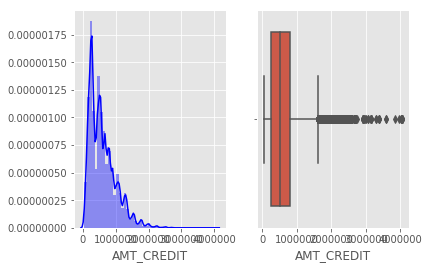

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(application["AMT_CREDIT"], color = 'blue', ax = ax1)
sns.boxplot(x=application["AMT_CREDIT"], ax = ax2)
plt.show()

The distribution looks right skewed which makes sense as not many people would be taking a very high amount loan. The next thing we are going to do is to plot multiple plots by using GridSpec. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


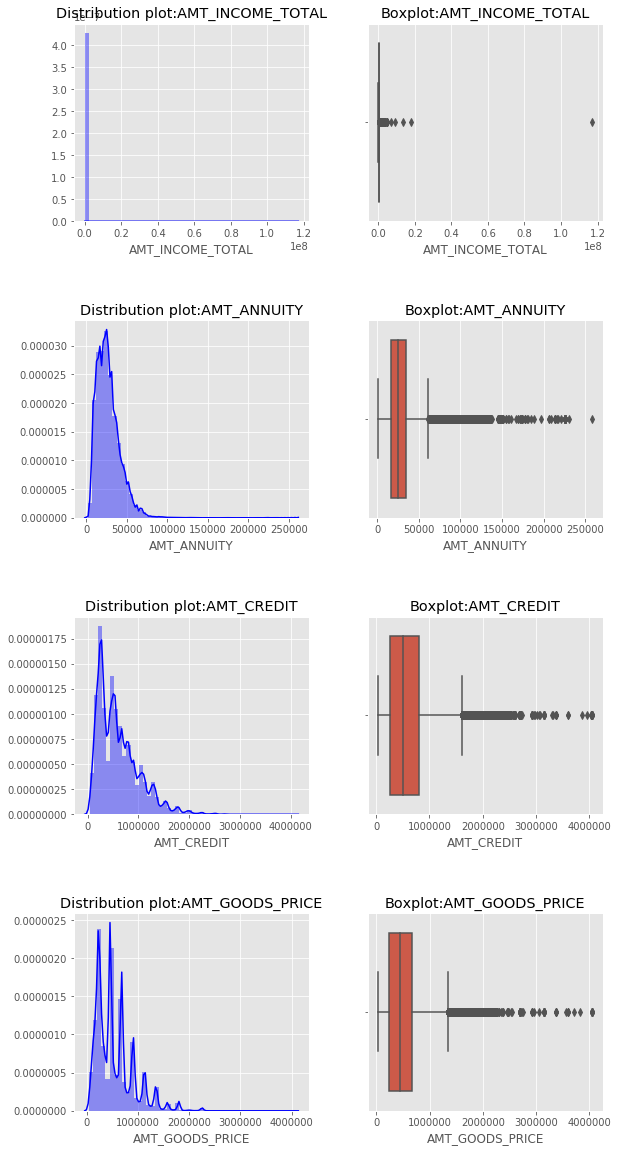

In [12]:
import matplotlib.gridspec as gridspec
G = gridspec.GridSpec(4, 4)
G.update(wspace=0.25, hspace=0.5)
plt.figure(figsize = (20,20))
axes_l = []
numeric_cols = ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "AMT_CREDIT", "AMT_GOODS_PRICE"]
row_index = 0
col_index = 0
axes_count = 0
for i, col in enumerate(numeric_cols):
    #Plotting distribution plot 
    row_index = i
    axes_l.append(plt.subplot(G[row_index, col_index]))
    if application[col].isnull().sum() == 0:
        sns.distplot(application[col], color = 'blue', ax = axes_l[axes_count])
    else:
        sns.distplot(application[col].dropna(), color = 'blue', ax = axes_l[axes_count])
    plt.title('Distribution plot:'+col)
              
    axes_count+=1
    col_index+=1
    #Plotting boxplot
    axes_l.append(plt.subplot(G[row_index, col_index]))
    if application[col].isnull().sum() == 0:
        sns.boxplot(application[col], ax = axes_l[axes_count])
    else:
        sns.boxplot(application[col].dropna(), ax = axes_l[axes_count])
    plt.title('Boxplot:'+col)    
              
    axes_count += 1
    col_index = 0

# axes_l
plt.show()

* Most of the distributions are right skewed. If one wants to proceed with linear modeling then they might as well think about Log transforming the variables
* AMT_GOODS_PRICE and AMT_CREDIT seem to have similar distribution which is also confirmed by summary statistics. Let's look at the correlation between the 2 columns and also plot a scatterplot
 

In [13]:
application[['AMT_GOODS_PRICE', 'AMT_CREDIT']].corr()

,AMT_GOODS_PRICE,AMT_CREDIT
AMT_GOODS_PRICE,1.00,0.99
AMT_CREDIT,0.99,1.00


Let's just check if any of the two variables have missing values

In [14]:
application[['AMT_GOODS_PRICE', 'AMT_CREDIT']].isnull().sum()

AMT_GOODS_PRICE    278
AMT_CREDIT           0
dtype: int64

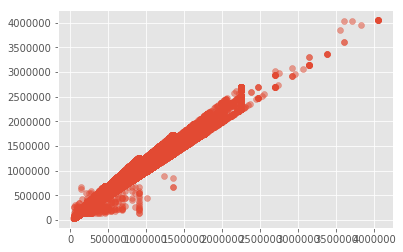

In [15]:
plt.scatter(x = application['AMT_GOODS_PRICE'], y = application['AMT_CREDIT'], alpha=0.5)
plt.show()

There is a very high correlation between these 2 columns. So we will be imputing the missing values of AMT_GOODS_PRICE by AMT_CREDIT by taking a factor of avg( AMT_CREDIT)/avg( AMT_GOODS_PRICE) * AMT_CREDIT

# 5. Inspecting age variable
1. Describe function (summary statistics) will help us in QC'ing the column. We can get to know if there any outliers
2. Then we will plot the distribution when target = 0 and target = 1 and see if age plays any role in defaulting a loan

In [16]:
application["AGE"] = application["DAYS_BIRTH"].abs()/365
application["AGE"].describe()

count   307511.00
mean        43.94
std         11.96
min         20.52
25%         34.01
50%         43.15
75%         53.92
max         69.12
Name: AGE, dtype: float64

Max and min shows that the values of this variable all lie within the range of 20 to 70. Thus it looks like this column has clean data

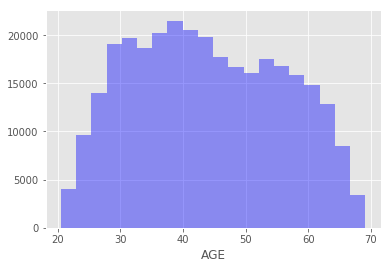

In [17]:
#Plotting age distribution
fig, ax = plt.subplots()
sns.distplot(application["AGE"], color = 'blue', bins=20, kde=False, norm_hist=False)
plt.show()

To see if age is influencing loan default or not we will plot the density plots with target = 0 and target = 1 and hopefully it will give us some clarity

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

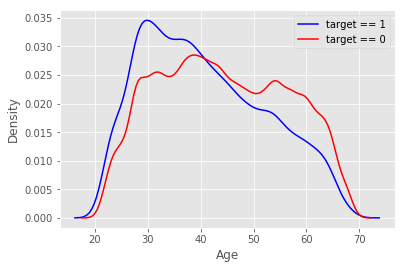

In [18]:
sns.kdeplot(application[application["TARGET"]==1]["AGE"], color = 'blue', label = 'target == 1')
sns.kdeplot(application[application["TARGET"]==0]["AGE"], color = 'red', label = 'target == 0')
plt.xlabel('Age')
plt.ylabel('Density')
plt.plot()


It is evident that age is influencing the default rate as younger people have a higher tendency of default. 

# 6. Looking at Days_ columns

In [19]:
days_cols = []
days_cols = [col for col in application.columns if col.find("DAYS")!=-1]
application[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.00,307511.00,307511.00,307511.00,307510.00
mean,-16037.00,63815.05,-4986.12,-2994.20,-962.86
std,4363.99,141275.77,3522.89,1509.45,826.81
min,-25229.00,-17912.00,-24672.00,-7197.00,-4292.00
25%,-19682.00,-2760.00,-7479.50,-4299.00,-1570.00
50%,-15750.00,-1213.00,-4504.00,-3254.00,-757.00
75%,-12413.00,-289.00,-2010.00,-1720.00,-274.00
max,-7489.00,365243.00,0.00,0.00,0.00


All the days are negative as time is considered relative to the date of application. However, we observe that Days_employed has maximum value of 365243. According to the business, this value represents Nulls. So we will first look at how many nulls are present and then impute the nulls and create a binary flag column which states whether the value of DAYS_EMPLOYED is null or not.

In [20]:
application[application["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].shape

(55374,)

 We will create a binary column where 1 will indicate anomalous data and 0 otherwise. We will also replace anomalous data with 0

In [21]:
#Creating the binary column and setting the value = 1 wherevr the value of days_employed will be 365243
application["DAYS_EMPLOYED_ANOMALY"] = 0
anomalous_indices = application[application["DAYS_EMPLOYED"] > 0]["DAYS_EMPLOYED"].index
application.loc[anomalous_indices, "DAYS_EMPLOYED_ANOMALY"] = 1
#Replacing anomalies with 0
application["DAYS_EMPLOYED"].replace(365243, 0, inplace=True)
application[["DAYS_EMPLOYED", "DAYS_EMPLOYED_ANOMALY"]][:15]

,DAYS_EMPLOYED,DAYS_EMPLOYED_ANOMALY
0,-637,0
1,-1188,0
2,-225,0
3,-3039,0
4,-3038,0
5,-1588,0
6,-3130,0
7,-449,0
8,0,1
9,-2019,0


# 7. Investigating EXTSOURCE columns
The information comes from external sources and is normalized between 0 - 1. We don't have much information as to how it is derived. The EXTSOURCE3 is highly correlated to our target variable. We will plot the distributions for these columns which will be similar to Age distribution and we will also have a look at the missing values present in these columns.

In [22]:
application[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.00,306851.00,246546.00
mean,0.50,0.51,0.51
std,0.21,0.19,0.19
min,0.01,0.00,0.00
25%,0.33,0.39,0.37
50%,0.51,0.57,0.54
75%,0.68,0.66,0.67
max,0.96,0.85,0.90


i) Plotting the distributions for target = 1 and target = 0

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


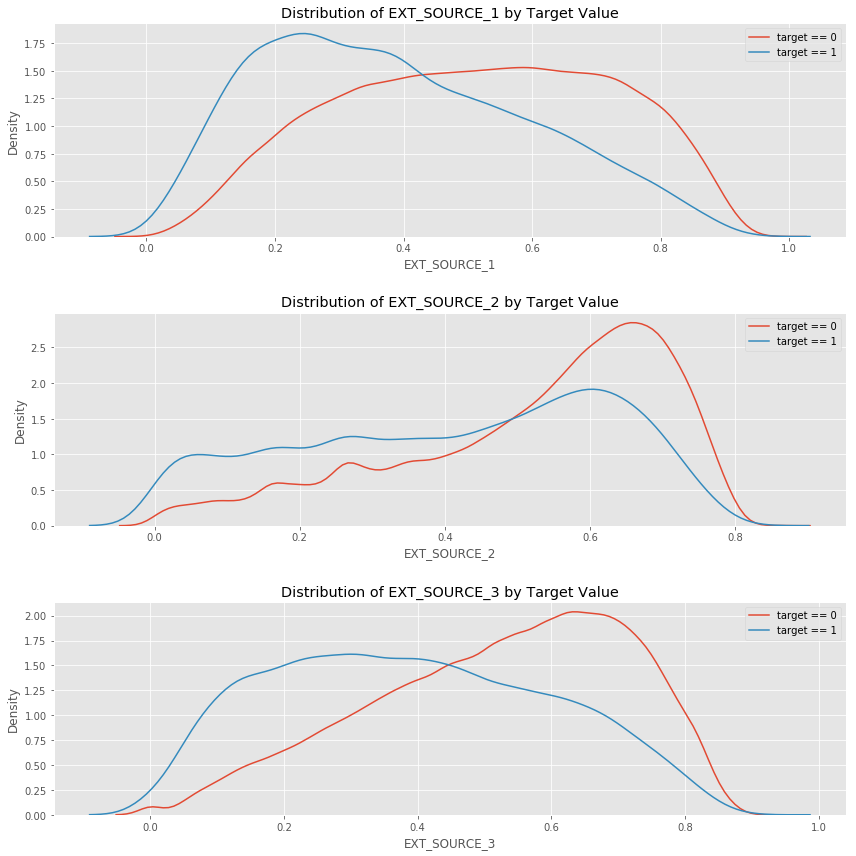

In [23]:
#The code below was obtained from the kaggle kernel mentioned above
#The code can also be implemented in a way similar to what was described in AMT columns

plt.figure(figsize = (12, 12))
# iterate through the new features
for i, feature in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application.loc[application['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application.loc[application['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

There is a clear distinction between distributions for target =0 and target = 1 for EXT_SOURCE_1 and EXT_SOURCE_3. Lower values of ext_source columns indicate a high default chance and higher values of these columns represent a lower default chance

ii) Missing values check

In [24]:
print("The following numbers are indicative of missing values in %")
application[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull().sum()/application.shape[0] * 100

The following numbers are indicative of missing values in %


EXT_SOURCE_1   56.38
EXT_SOURCE_2    0.21
EXT_SOURCE_3   19.83
dtype: float64

As we don't have much information as how to ext_source_data is derived and with a lot of missing values present, our only guess of imputing the missing values is by median

With this we draw an end to analysis of continuous variables and this by no means is an exhaustive EDA as there are 100's of continuous variables in the entire dataset. But there is one interesting question that arises after looking at the KDE (or distribution) plots. How come the y-axis of these plots have values greater than 1? Here are some links on the same topic:
* https://en.wikipedia.org/wiki/Kernel_density_estimation
* https://stackoverflow.com/questions/32274865/seaborn-distplot-y-axis-normalisation-wrong-ticklabels
* https://stats.stackexchange.com/questions/138484/displaying-frequency-when-using-kernel-density-estimation
* https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

# It's time for categorical variables now!!
When it comes to visualizing categorical variables, bar charts are one of the most common and popular visualziation technique. It's pretty effective as well. Here we will explore Gender and NAME_INCOME_TYPE variables. <br>
We will look at how to plot the following variations of bar chart using matplotlib: 
    1. Normal bar chart (Both horizontal and vertical)
    2. Group bar chart 
    3. Stacked bar chart 

# 8. Age variable

Normal bar chart will allow us to look at the count( or proportion) of each gender

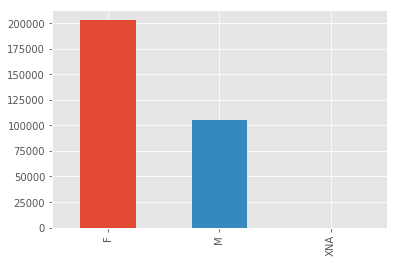

In [25]:
#One line of code to plot bar plot
application["CODE_GENDER"].value_counts().plot.bar()

[202448 105059      4] ['F', 'M', 'XNA']


<BarContainer object of 3 artists>

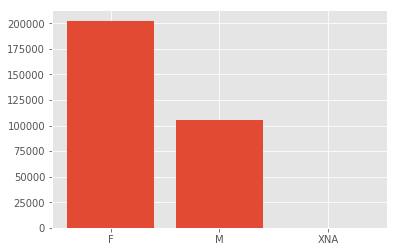

In [26]:
gen_typ = application["CODE_GENDER"].value_counts()
gen_typ_vals = gen_typ.values
gen_typ_idx =  gen_typ.index.tolist()
print(gen_typ_vals, gen_typ_idx)
plt.bar(gen_typ_idx, gen_typ_vals)

Grouped bar chart (Helps us in knowing what proportion of each gender repaid or defaulted the loan)

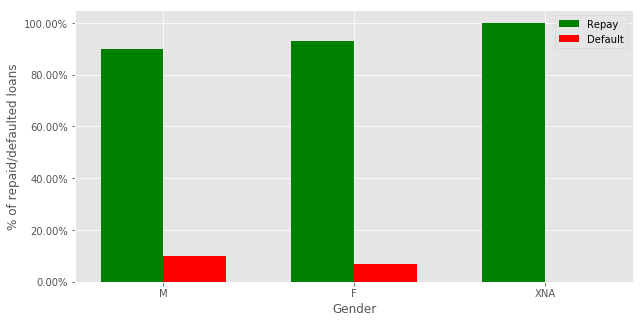

In [27]:
repay = []
default = []
gender = application["CODE_GENDER"].unique()
for g in gender:
    default.append(application[(application["CODE_GENDER"]==g) & (application["TARGET"]==1)].shape[0]/application[(application["CODE_GENDER"]==g)].shape[0] * 100)
    repay.append(application[(application["CODE_GENDER"]==g) & (application["TARGET"]==0)].shape[0]/application[(application["CODE_GENDER"]==g)].shape[0] * 100)

fig, ax = plt.subplots(figsize=(10,5))
pos = list(range(len(gender)))
width = 0.33
plt.bar(pos, repay, width, color='g')
plt.bar([p+width for p in pos], default, width, color='r')
plt.legend(["Repay", "Default"])

#X-axis manipulations
ax.set_xticks([p+0.5*width for p in pos])
ax.set_xticklabels(list(gender))
ax.set_xlabel('Gender')

#Y-axis manipulations
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
ax.set_ylabel('% of repaid/defaulted loans')

plt.show()

Stacked percentage bar chart

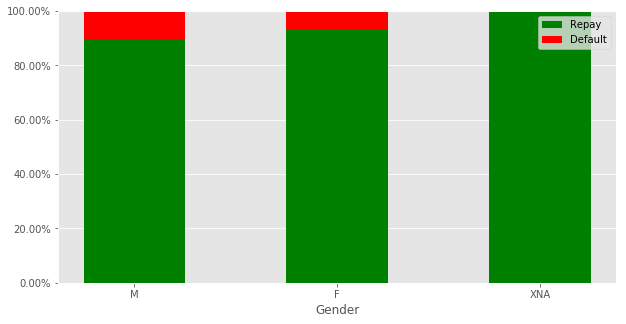

In [28]:
repay = []
default = []
gender = application["CODE_GENDER"].unique()
for g in gender:
    default.append(application[(application["CODE_GENDER"]==g) & (application["TARGET"]==1)].shape[0]/application[(application["CODE_GENDER"]==g)].shape[0] * 100)
    repay.append(application[(application["CODE_GENDER"]==g) & (application["TARGET"]==0)].shape[0]/application[(application["CODE_GENDER"]==g)].shape[0] * 100)

fig, ax = plt.subplots(figsize=(10,5))
pos = list(range(len(gender)))
width = 0.5
plt.bar(pos, repay, width=width, color='g', label='Repay')
plt.bar(pos, default, width=width, bottom=repay, color='r', label='Default')
plt.legend(["Repay", "Default"])

ax.set_xticks([p for p in pos])
ax.set_xticklabels(list(gender))
ax.set_xlabel('Gender')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x/100) for x in vals])
plt.show()

Finding: Men seem to have a higher proportion of default % but also men have double the applications as compared to women

# 9. Exploring NAME_INCOME_TYPE variable (Perils of blindly trusting graphs)
The visualizations will be very similar to what we did with the GENDER variable but we will look at how certain graphs can be misleading 

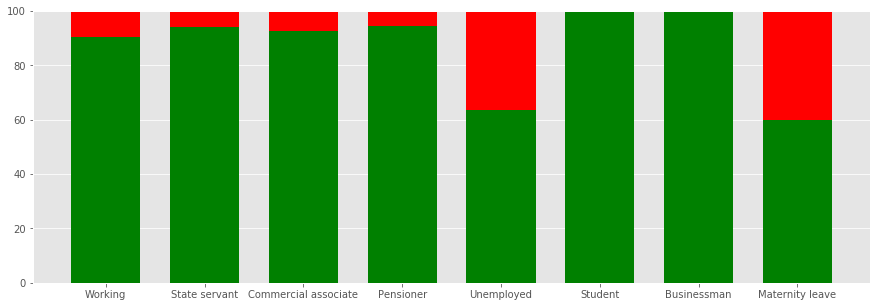

In [29]:
repay = []
default = []
inc_typ = application["NAME_INCOME_TYPE"].unique()
for g in inc_typ:
    default.append(application[(application["NAME_INCOME_TYPE"]==g) & (application["TARGET"]==1)].shape[0]/application[(application["NAME_INCOME_TYPE"]==g)].shape[0] * 100)
    repay.append(application[(application["NAME_INCOME_TYPE"]==g) & (application["TARGET"]==0)].shape[0]/application[(application["NAME_INCOME_TYPE"]==g)].shape[0] * 100)
    
fig,ax = plt.subplots(figsize=(15,5))
width = 0.7
pos = list(range(len(repay)))
plt.bar(pos, repay, width=width, color='g')
plt.bar(pos, default, width=width, bottom=repay, color='r', label='Default')
ax.set_xticks([p for p in pos])
ax.set_xticklabels(inc_typ)
plt.show()

While it's not surprising to see unemployed with a higher default rate compared to others but what's baffling is that maternity leave category has the highest proportion of default %. <br>
Before jumping to conclusions we should make sure what is the count(rows) of each of these categories in the column

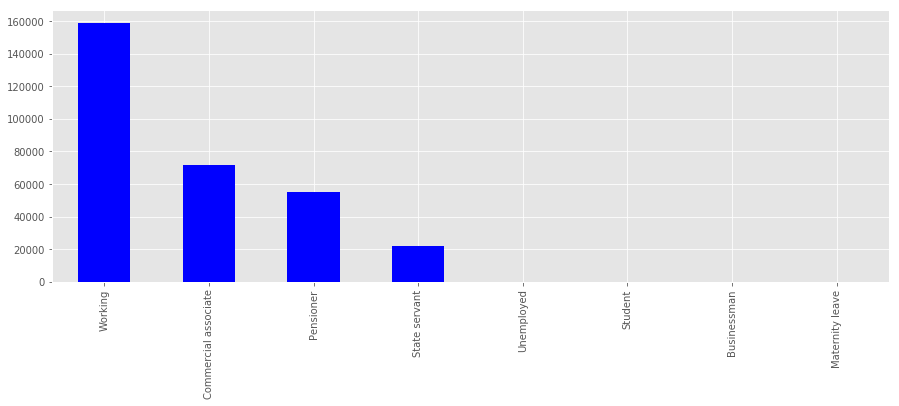

In [30]:
fig,ax = plt.subplots(figsize=(15,5))
inc_type = application["NAME_INCOME_TYPE"].value_counts()
inc_type.plot.bar(color='b')

In [31]:
inc_type

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Looking at the count of rows for each category, it becomes clear that there are very few records for 'Unemployed' and 'Maternity leave' and it would have been disastrous jumping to conclusions based on the stacked bar chart alone.

# 10. Learnings
While there are a number of other variables that can be explored, we nonetheless have a vast list of learnings from the above exploration:

Let's divide the learning section into two parts: 1. Data exploration and processing 2. Python visualization

**Data Exploration and Processing**
1. Correlation: Serves as a good starting point for analysis
2. Missing value treatment:
    *  Dropping columns: Here we dropped columns that had a very high proportion of missing values and had low correlation with target variable. This may not be always be a good idea
    * Imputation by common methods: Mean and Median for continuous variables and Mode for categorical variables
    * Imputation (other techniques): Here in one case we found that there exists a high correlation between two variables and based on that, imputation was carried out. Similarly business or domain knowledge can also be applied to impute certain columns. This process is time-consuming but can be effective
    * Leave as it is: Certain algorithms like Gradient Boosting are not affected by missing values so it is not necessary to treat them
3. Data consistency: Summary statistics(describe() in pandas) of the columns can be a way to QC the data
    * Helps in identifying ouliers present in the data
    * We looked at a way of how to create a binary column for anomalous data

Some points that are a part of pre-processing but were not covered here
1. Log transformation of Skewed variables for linear modeling
2. Outlier treatment: Some commonly known techniques 
    * Univariate detection: Z-score, IQR      
    * Multivariate detection: Mahalanobis distance, Cook's distance(mostly for linear regression)
3. One hot encoding for categorical variables


**Python Visualization**
1. Bar graph
2. Stacked and grouped bar chart
3. Histogram
4. Density plots
5. Scatterplots